In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Ejercicio 1

In [2]:
def rk4_single(f, y0, t0, tf, h):
    t = np.arange(t0, tf, h)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

In [3]:
def rk4_system(f, y0, t0, tf, h):
    t = np.arange(t0, tf, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * np.array(f(t[i-1], y[i-1]))
        k2 = h * np.array(f(t[i-1] + h/2, y[i-1] + k1/2))
        k3 = h * np.array(f(t[i-1] + h/2, y[i-1] + k2/2))
        k4 = h * np.array(f(t[i-1] + h, y[i-1] + k3))
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

# Ejercicio 2

## 2a
Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO.


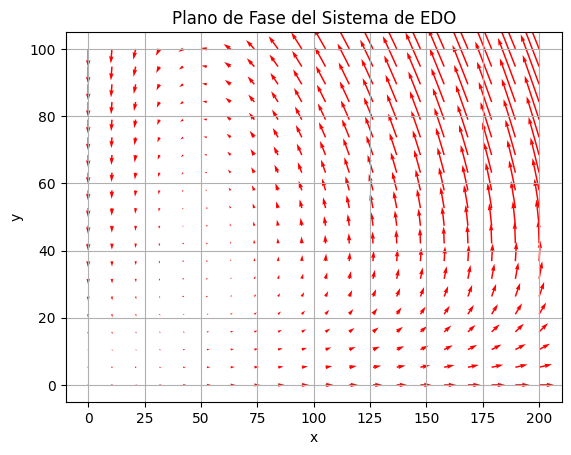

In [5]:
def field(x, y):
    dxdt = 0.2 * x - 0.005 * x * y
    dydt = -0.5 * y + 0.01 * x * y
    return dxdt, dydt

x = np.linspace(0, 200, 20)
y = np.linspace(0, 100, 20)
X, Y = np.meshgrid(x, y)
U, V = field(X, Y)

plt.quiver(X, Y, U, V, color='r')
plt.title("Plano de Fase del Sistema de EDO")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## 2b
Usando algoritmos computacionales, encuentre todos los puntos de equilibro del sistema de EDO (sólo los que están en el primero cuadrante, incluyendo los ejes y el origen) y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente cómo se comportan las soluciones cerca del punto de equilibro obtenido.

In [8]:
def equilibrium(vars):
    x, y = vars
    eq1 = 0.2 * x - 0.005 * x * y
    eq2 = -0.5 * y + 0.01 * x * y
    return [eq1, eq2]

equilibria = fsolve(equilibrium, [1, 1])
print(f"Puntos de equilibrio: {equilibria}")

Puntos de equilibrio: [-5.e-324  5.e-324]


## 2c
Resuelva el sistema de EDO, con su algoritmo de Runge-Kutta, para la condición inicial 

x(0) = 70, y(0) = 30

Obtenga una gráfica de la solución obtenida, y estime cuál sería la población x & y después de 5 años. Aproxime cuál es el valor del período o ciclo de repetición de las poblaciones.

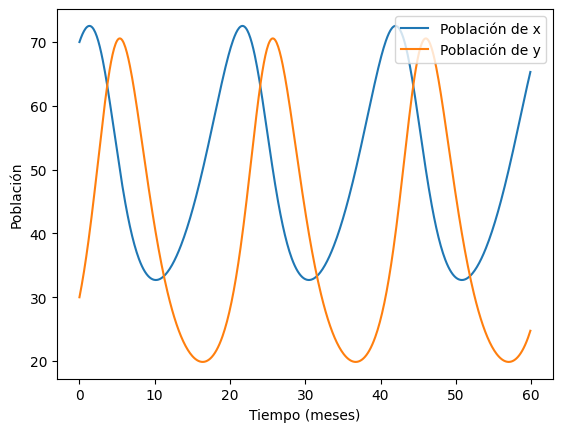

In [9]:
def system(t, y):
    x, y = y
    dxdt = 0.2 * x - 0.005 * x * y
    dydt = -0.5 * y + 0.01 * x * y
    return [dxdt, dydt]

t0 = 0
tf = 12 * 5  # 5 años en meses
h = 0.1
y0 = [70, 30]

t, sol = rk4_system(system, y0, t0, tf, h)

x, y = sol[:, 0], sol[:, 1]
plt.plot(t, x, label='Población de x')
plt.plot(t, y, label='Población de y')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.legend()
plt.show()

## 2d
Repita la solución del sistema de EDO, esta vez para la condición inicial 

x(0) = 100, y(0) = 10

Obtenga una gráfica de la solución obtenida, y estime cuál será la población para las especies x y y después de 5 años. Aproxime cuál es el valor del período o ciclo de repetición de las poblaciones.

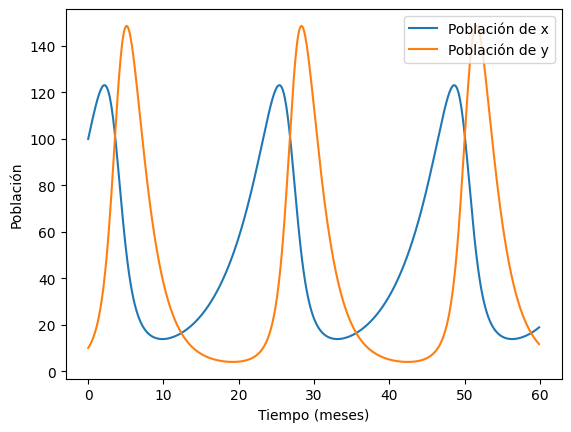

In [12]:
y0 = [100, 10]
t, sol2 = rk4_system(system, y0, t0, tf, h)

x, y = sol2[:, 0], sol2[:, 1]
plt.plot(t, x, label='Población de x')
plt.plot(t, y, label='Población de y')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.legend()
plt.show()


## 2e
Grafique ambas trayectorias obtenidas en su plano de fase xy (encima del campo vectorial). Ilustre en la gráfica el valor de la población inicial y final (a los 5 años) en cada caso.

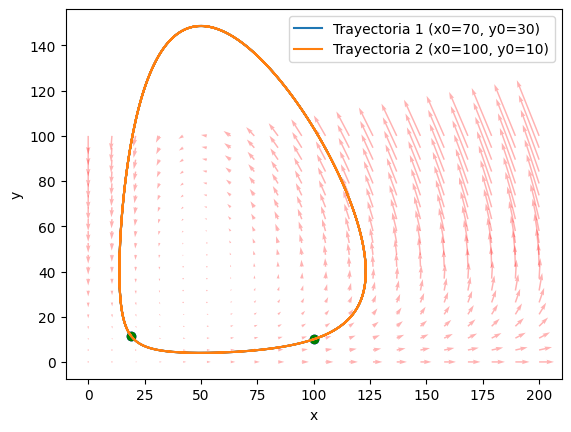

In [13]:
plt.quiver(X, Y, U, V, color='r', alpha=0.3)
plt.plot(sol[:, 0], sol[:, 1], label='Trayectoria 1 (x0=70, y0=30)')
plt.plot(sol2[:, 0], sol2[:, 1], label='Trayectoria 2 (x0=100, y0=10)')
plt.scatter([sol[0, 0], sol[-1, 0]], [sol[0, 1], sol[-1, 1]], color='blue')  # Población inicial y final para la primera trayectoria
plt.scatter([sol2[0, 0], sol2[-1, 0]], [sol2[0, 1], sol2[-1, 1]], color='green')  # Población inicial y final para la segunda trayectoria
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 2f
Explique o describa cualitativamente el comportamiento del sistema de poblaciones.